## Latar Belakang

Berikut ini adalah data airbnb Bangkok yang akan dieksplorasi menggunakan python dan statistik, data ini akan melewati proses data cleaning, analisa dan visualisasi menggunakan python dan tableu

## Data

In [1]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset terdiri dari 17 kolom, yaitu:
1. Unnamed: 0: Index atau nomor urut data
2. id: ID listing unik
3. name: Nama Property yang disewakan pada aplikasi airbnb
4. host_id: ID host/user yang menyewakan property
5. host_name: nama host/user yang menyewakan property
6. neighbourhood: tempat terkenal disekitar area property
7. latitude: titik ordinat property
8. longitude: titik ordinat property
9. room_type: tipe ruangan yang disewakan
10. price: harga sewa harian
11. minimum_nights: minimun jumlah hari sewa
12. number_of_review: jumlah ulasan property
13. last_review: tanggal terakhir direview orang pelanggan
14. review_per_month: jumlah ulasan per bulan
15. calculated_host_listings_count: jumlah host property
16. availability_365:ketersediaan jumlah hari property dapat disewa
17. number_of_reviews_ltm: jumlah review dalam 1 tahun terakhir

Berikut 5 baris teratas dan 5 baris terbawah dataset Airbnb listing Bangkok

In [4]:
df=pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


## Data Understanding and Cleaning

In [5]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

In [6]:
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [7]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel roo

Secara umum dapat dilihat bahwa:
1. Data terdiri dari 17 kolom, 15854 baris
2. Data Nan menandakan terdapat data kosong, yaitu terdapat pada kolom: name, host_name, last_review, review_per_month
3. Kolom unnamed: 0 merupakan nomor urut data, sama fungsinya dengan index, sehingga kolom ini sebenarnya dapat dihapus
4. Jumlah host_id unik terdiri dari 6659 sedangkan host_name unik terdiri dari 5312, seharusnya jumlah host_id unik sama dengan jumlah host_name unik, menandakan ada kemungkinan host_name yang memiliki host_id lebih dari 1 
5. Jumlah id unik terdiri dari 15854 sedangkan jumlah name listing property terdiri dari 14794, seharusnya jumlah id sama dengan jumlah name, menandakan ada kemungkinan name yang memiliki id lebih dari 1, atau ada name kosong

## Missing Value

In [8]:
# persentase missing value di tiap kolom
np.round(
    (df.isna().sum()/df.shape[0]*100),
    2
)

Unnamed: 0                        0.00 
id                                0.00 
name                              0.05 
host_id                           0.00 
host_name                         0.01 
neighbourhood                     0.00 
latitude                          0.00 
longitude                         0.00 
room_type                         0.00 
price                             0.00 
minimum_nights                    0.00 
number_of_reviews                 0.00 
last_review                       36.52
reviews_per_month                 36.52
calculated_host_listings_count    0.00 
availability_365                  0.00 
number_of_reviews_ltm             0.00 
dtype: float64

<Axes: >

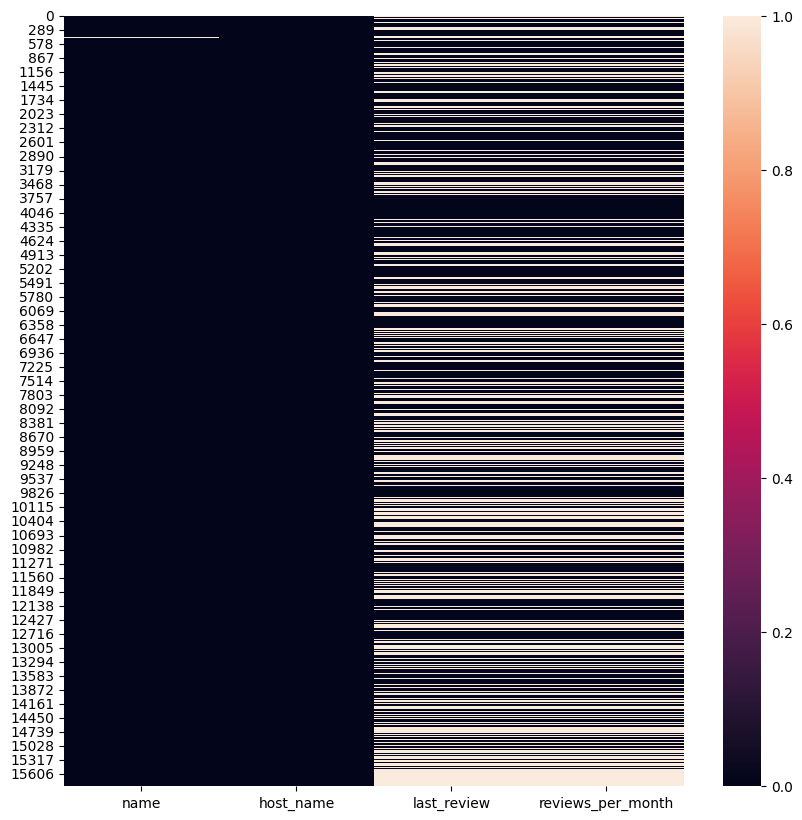

In [9]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['name','host_name','last_review','reviews_per_month']].isna())

Kesimpulan dari sebaran missing value ini adalah:
1. Jumlah missing value pada kolom last_review = reviews_per_month, karena jika belum ada yang mereview maka otomatis kolom review per month juga isinya akan NaN juga
2. Jumlah missing value pada kolom name hanya sebagian kecil yaitu 5%
3. Jumlah missing value pada host_name juga kecil yaitu 1%

Cara mengatasi missing value:
1. Kolom NaN pada last_review akan direplace dengan data lain yaitu "0"
2. Menghapus baris pada kolom 'name' dan 'host_name' mengandung data NaN karena persentase missing value sangat kecil < 10%

In [10]:
# jumlah missing value di kolom 'last_review' dan 'reviews_per_month'
df[['last_review', 'reviews_per_month']].isna().sum()

last_review          5790
reviews_per_month    5790
dtype: int64

In [11]:
# mengisi data kosong pada pada 'last_review' dan 'reviews_per_month'
df.loc[(df['last_review'].isna())&(df['reviews_per_month'].isna()),['last_review', 'reviews_per_month']] = '0'

In [12]:
# jumlah data kosong setelah pengisian
df[['last_review', 'reviews_per_month']].isna().sum()

last_review          0
reviews_per_month    0
dtype: int64

In [13]:
# menampilkan data NaN pada kolom 'name'
df[df['name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,0,0,1,365,0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,0,0,1,365,0
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,0,0,1,365,0
669,669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,0,0,1,365,0
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,0,0,1,365,0
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,0,0,1,365,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [14]:
# menampilkan data NaN pada kolom 'host_name'
df[df['host_name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [15]:
# menghapus data NaN pada kolom 'host_name'
df.dropna(subset=['host_name'], inplace= True)

In [16]:
# mengecek apakah data NaN pada kolom 'host_name' sudah terhapus
df[df['host_name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [17]:
# menghapus data NaN pada kolom 'name'
df.dropna(subset=['name'], inplace= True)

In [18]:
# mengecek apakah data NaN pada kolom 'name' sudah terhapus
df[df['name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [19]:
# mengecek persentase missing value di tiap kolom
np.round(
    (df.isna().sum()/df.shape[0]*100),
    2
)

Unnamed: 0                        0.0
id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
dtype: float64

Sampai di sini cleaning missing data sudah selesai dilakukan

Selanjutnya adalah pengecekan terhadap data 'host_name' dan 'host_id' yang jumlahnya berbeda

In [20]:
cek_host_name = df.groupby(by= "host_name")['host_id'].count().reset_index()
cek_host_name[cek_host_name.host_id > 1].reset_index(drop=False)

,index,host_name,host_id
0,1,1905 Heritage Corner,3
1,2,1989 Ratchada,8
2,5,A,2
3,11,Aaron,11
4,12,Abby,2
...,...,...,...
2112,5286,铭,2
2113,5291,飞,9
2114,5295,서령,2
2115,5298,은영,10


In [21]:
data_host_name = df[['host_name', 'host_id', 'id', 'name']].sort_values('host_name')
data_host_name.head(50)

,host_name,host_id,id,name
1083,.● Bm,29631121,8549809,Big 1BR • Step to BTS •Comfy bed• 欢迎各位
4280,1905 Heritage Corner,164923659,22490370,Standard Room : Tea Room (Room 3)
4275,1905 Heritage Corner,164923659,22488327,Superior Room : Chinese Settlers (Room 1)
4281,1905 Heritage Corner,164923659,22491355,Superior Room : Colonial (Room 2)
10487,1989 Ratchada,217613757,42074570,"Shared room, cheap, good value, Walk MRT 5Mins"
5952,1989 Ratchada,217613757,28873208,1989 hostel & cafe @Ratchada
5922,1989 Ratchada,217613757,29304724,1989 hostel&cafe at ratchada\nSoi viphavadi 16/29
10087,1989 Ratchada,217613757,41575942,2P/Walk MRT Ratchada 5Min/Rodfai night market
10088,1989 Ratchada,217613757,41576250,Slow life start from here/8mins MRT Ratchadaphisek
10486,1989 Ratchada,217613757,42074007,"Private/Walk MRT Ratchada 5 Mins,JJ market,Mochit"


Dari tabel data host name di atas menunjukan bahwa:
- Bukti adanya 1 'host_name' yang memiliki > 1 'host_id' yaitu dapat dilihat dari 'host_name' A, Aaron, Abby, Abe
- Ada kemungkinan 1 'host_name' ini mendaftar ulang beberapa kali dan men-generate beberapa 'host_id' baru --> jika ini yang terjadi perlu penelusuran lanjut mengapa 'host_name' ini membuat 'host_id' lebih dari 1 
- Ada kemungkinan pula bahwa 'host_name' yang bernama A, Aaron, Abby, Abe dengan 'host_id' berbeda merupakan orang yang berbeda yang kebetulan memiliki nama yang sama --> jika ini yang terjadi harusnya pada tampilan 'host_name' ditampilkan Full name dari 'host_name' bersangkutan

In [22]:
cek_name = df.groupby(by= "name")['id'].count().reset_index()
cek_name[cek_name.id > 1].reset_index(drop=False)

,index,name,id
0,146,- Hyde Sukhumvit 11 - Elegant Design - BTS NANA,2
1,148,- Hyde Sukhumvit 11 - Glamorous Design - BTS NANA,5
2,149,- Hyde Sukhumvit 11 - Glamorous Design 2BR -,2
3,150,- Hyde Sukhumvit 11 - High Floor City View - NANA,2
4,151,- Hyde Sukhumvit 11 - High Floor Hyper View - NANA,2
...,...,...,...
445,14470,"曼谷市中心高端公寓/近BTS/游泳池/健身房,近BTS,免费高速WIFI,帕蓬夜市14分钟可达",2
446,14555,月租特惠！豪华两卧两卫！Ekkamai BTS/The Emporium/曼谷大学/无边泳池/健身房,2
447,14700,近Ekkamai BTS/WIFI/一房一厅/楼下7-11便利店,2
448,14706,近onnut BTS站/高速WIFI/7-11便利店/15分钟到暹罗广场四面佛&泳池健身房&每客消毒,11


In [23]:
data_name = df[['host_name', 'host_id', 'id', 'name']].sort_values('name')
data_name.head(50)

,host_name,host_id,id,name
9889,Bon,176686914,41003933,!!!OMG!!/4 mins to Train St./Train Market/火车头夜市
14938,Shazzy & Sasan,359746382,752165766427877536,!NEW! Ultra Modern Condo-Sky Pool-Terminal 21
11656,Goong,59260623,49679312,""" Cozy and Warm house in Samsen /Dusit Bangkok"""
816,Salvatore,6132593,6753043,"""1 Bed Serviced SkyVillas with view"""
1255,Suragate,41182432,7821555,"""Cana Mansion"" Tha-Pra RoomForRent"
6767,Kwang,227429630,31526601,"""Clean and Silent space around CHATUJAK"""
11678,Hh,271194608,51446515,"""Cozy and colorful apartment in Bangna"
3848,Anupong,24147370,20987416,"""Feel Like Home"" 4 BR Townhouse @ BTS ONNUT"
14328,Chuanpis,195325142,733960271401460593,"""Lucky Home""1BR_1min to Sukhumvit BTS On-Nut"
5150,Xin,13513301,25491603,"""Mi-Wood"" Cosy home@ASOK & 8min Walk to MRT QSNCC"


In [24]:
data_name[data_name.name == '- Hyde Sukhumvit 11 - Glamorous Design 2BR -']


,host_name,host_id,id,name
13134,Ludoping,62257044,645298020193512398,- Hyde Sukhumvit 11 - Glamorous Design 2BR -
15094,Terry,62256771,753267453404046673,- Hyde Sukhumvit 11 - Glamorous Design 2BR -


In [25]:
data_name[data_name.name == '- Hyde Sukhumvit 11 - Glamorous Design - BTS NANA']


,host_name,host_id,id,name
14245,Terry,62256771,732592391410942137,- Hyde Sukhumvit 11 - Glamorous Design - BTS NANA
13599,Ludoping,62257044,683324189327549768,- Hyde Sukhumvit 11 - Glamorous Design - BTS NANA
14886,Terry,62256771,755613433253258356,- Hyde Sukhumvit 11 - Glamorous Design - BTS NANA
14664,Terry,62256771,745456492230493997,- Hyde Sukhumvit 11 - Glamorous Design - BTS NANA
14244,Terry,62256771,732537267465743575,- Hyde Sukhumvit 11 - Glamorous Design - BTS NANA


In [26]:
data_name[data_name.name == '月租特惠！豪华两卧两卫！Ekkamai BTS/The Emporium/曼谷大学/无边泳池/健身房']


,host_name,host_id,id,name
15474,Curry,201677068,780130696121233047,月租特惠！豪华两卧两卫！Ekkamai BTS/The Emporium/曼谷大学/无边泳池/健身房
15750,Noons,52161947,786580384742119025,月租特惠！豪华两卧两卫！Ekkamai BTS/The Emporium/曼谷大学/无边泳池/健身房


Dari data di atas menunjukan bahwa:
- Terdapat 1 property name yang mempunyai > 1 'id' property disebabkan oleh karena 'host_name' berbeda
- oleh karena itu terjawab sudah mengapa jumlah 'name' property yang disewakan lebih kecil daripada jumlah 'id' property, karena ada 1 property yang disewakan jugan oleh host/agen yang lebih dari 1 orang, dan 1 orang ini membuat 'host_id' baru untuk mendaftarkan 'id' atau 'name' property lain

## Data sudah bersih
Berikut sekilas informasi dari data yang sudah dibersihkan

In [27]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(15845, 17)


,dataFeatures,dataType,null,unique,uniqueSample
0,Unnamed: 0,int64,0,15845,"[7483, 3836]"
1,id,int64,0,15845,"[15665032, 780316548409242069]"
2,name,object,0,14793,"[Retro interior apartment, 素坤逸私人studio/泳池/健身房/步行BTS/零距离商场/美食聚集地/中英/赠送口罩]"
3,host_id,int64,0,6651,"[178899807, 179518525]"
4,host_name,object,0,5306,"[Natthida, Padasinee]"
5,neighbourhood,object,0,50,"[Wang Thong Lang, Pom Prap Sattru Phai]"
6,latitude,float64,0,9602,"[13.76338, 13.76639]"
7,longitude,float64,0,10222,"[100.4969, 100.6412]"
8,room_type,object,0,4,"[Shared room, Entire home/apt]"
9,price,int64,0,3040,"[2640, 1286]"


## DATA ANALYSIS

Pada data analisis ini kita akan lihat gambahan dari data yang ada, fakta-fakta tentang:
- tingkat keterisian dari tipe-tipe room,
- jumlah review pada tipe-tipe room,
- harga yang paling tinggi dari tipe-tipe room,
- lokasi neighbourhood yang paling banyak disewa,
- hubungan antara tingkat occupancy (keterisian) dengan harga, dengan jumlah review pelanggan

** Menambahkan kolom 'occupancy' untuk mengukur tingkat hunian atau keterisian properti yang disewakan.
- Rumusnya adalah 365 hari dikurangi dengan availability.
- Tingkat occupancy biasanya digunakan oleh bisnis hospitality untuk mengukur kinerja sebuah properti yang disewakan.

In [28]:
df2 = df.copy()
df2['occupancy'] = 365 - df2['availability_365']
df2

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,occupancy
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.5,2,353,0,12
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,0,2,358,0,7
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,0,1,365,0,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1,42
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,0,3,365,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,0,1,362,0,3
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,0,14,365,0,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,0,14,365,0,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,0,14,365,0,0


In [29]:
df2['reviews_per_month'] = df2['reviews_per_month'].astype(float)
df2['reviews_per_month']

0        0.50
1        0.00
2        0.00
3        0.03
4        0.00
         ... 
15849    0.00
15850    0.00
15851    0.00
15852    0.00
15853    0.00
Name: reviews_per_month, Length: 15845, dtype: float64

Berikut akan kita lihat histogram untuk melihat distribusi frekuensi dari data:
1. Harga
2. Occupancy
3. Jumlah Review
4. Jumlah Review per bulan
5. Minimum Bermalam

Text(0, 0.5, 'Frekuensi')

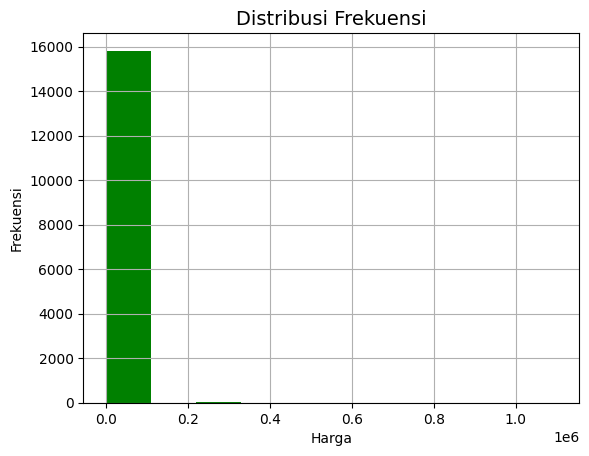

In [30]:
# change background
plt.figure(facecolor='white')

df2['price'].hist(color = "green")
plt.title("Distribusi Frekuensi", size= 14)
plt.xlabel("Harga")
plt.ylabel("Frekuensi")

Text(0, 0.5, 'Frekuensi')

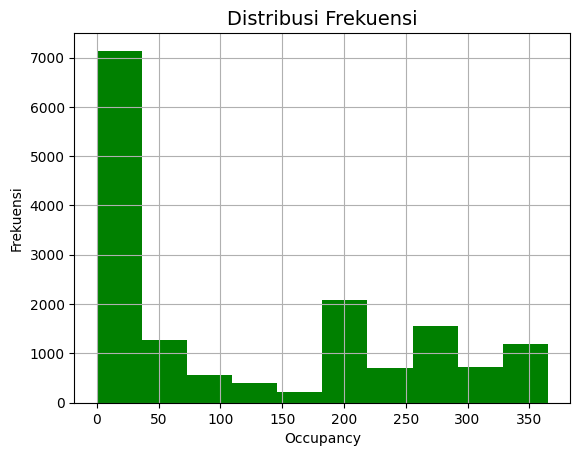

In [31]:
# change background
plt.figure(facecolor='white')

df2['occupancy'].hist(color = "green")
plt.title("Distribusi Frekuensi", size= 14)
plt.xlabel("Occupancy")
plt.ylabel("Frekuensi")

Text(0, 0.5, 'Frekuensi')

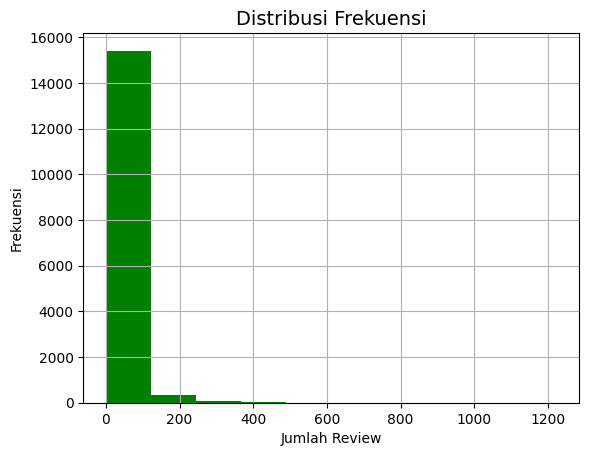

In [32]:
# change background
plt.figure(facecolor='white')

df2['number_of_reviews'].hist(color = "green")
plt.title("Distribusi Frekuensi", size= 14)
plt.xlabel("Jumlah Review")
plt.ylabel("Frekuensi")

Text(0, 0.5, 'Frekuensi')

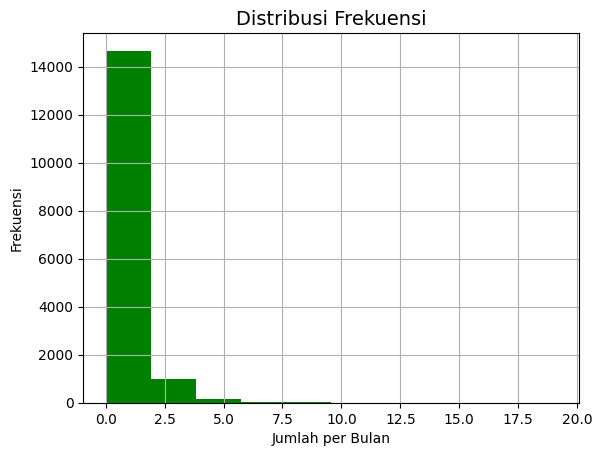

In [33]:
# change background
plt.figure(facecolor='white')

df2['reviews_per_month'].hist(color = "green")
plt.title("Distribusi Frekuensi", size= 14)
plt.xlabel("Jumlah per Bulan")
plt.ylabel("Frekuensi")

Text(0, 0.5, 'Frekuensi')

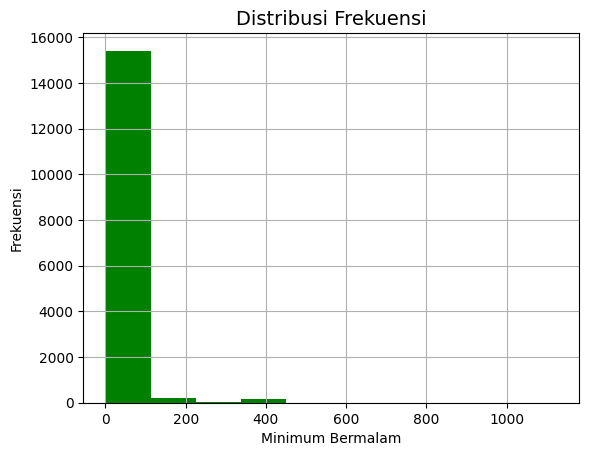

In [34]:
# change background
plt.figure(facecolor='white')

df2['minimum_nights'].hist(color = "green")
plt.title("Distribusi Frekuensi", size= 14)
plt.xlabel("Minimum Bermalam")
plt.ylabel("Frekuensi")

Berikut ini kita akan lihat boxplot untuk melihat nilai terendah, tertinggi dan outliers dari data:
1. Harga
2. Occupancy
3. Jumlah Review
4. Jumlah Review per bulan
5. Minimum Bermalam

Text(0, 0.5, 'Jumlah')

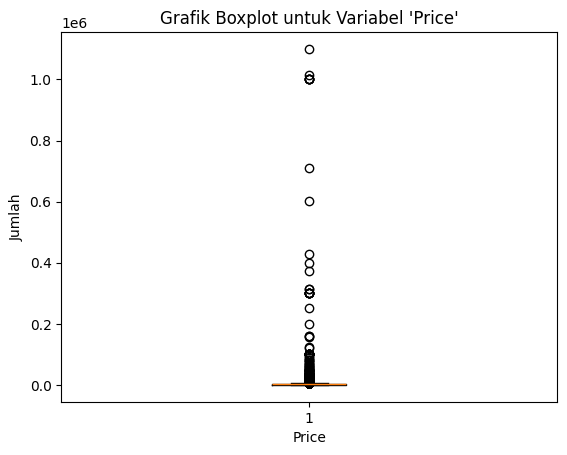

In [35]:
plt.figure(facecolor= "white")
plt.boxplot(df2['price'])
plt.title("Grafik Boxplot untuk Variabel 'Price'")

plt.xlabel("Price")
plt.ylabel("Jumlah")

Text(0, 0.5, 'Jumlah')

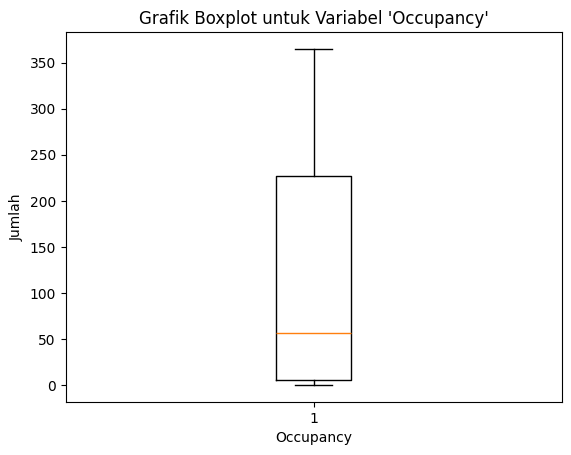

In [36]:
plt.figure(facecolor= "white")
plt.boxplot(df2['occupancy'])
plt.title("Grafik Boxplot untuk Variabel 'Occupancy'")

plt.xlabel("Occupancy")
plt.ylabel("Jumlah")

Text(0, 0.5, 'Jumlah')

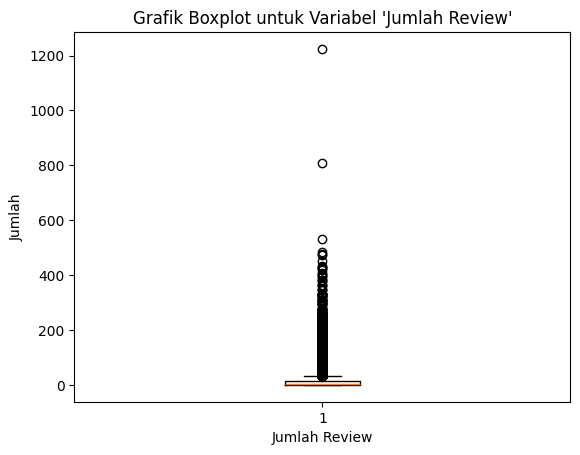

In [37]:
plt.figure(facecolor= "white")
plt.boxplot(df2['number_of_reviews'])
plt.title("Grafik Boxplot untuk Variabel 'Jumlah Review'")

plt.xlabel("Jumlah Review")
plt.ylabel("Jumlah")

Text(0, 0.5, 'Jumlah')

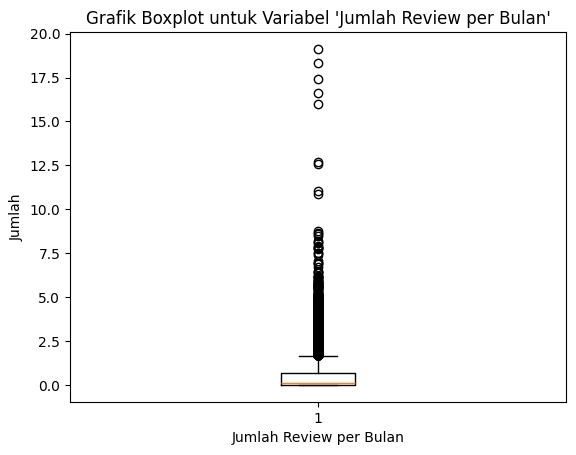

In [38]:
plt.figure(facecolor= "white")
plt.boxplot(df2['reviews_per_month'])
plt.title("Grafik Boxplot untuk Variabel 'Jumlah Review per Bulan'")

plt.xlabel("Jumlah Review per Bulan")
plt.ylabel("Jumlah")

Text(0, 0.5, 'Jumlah')

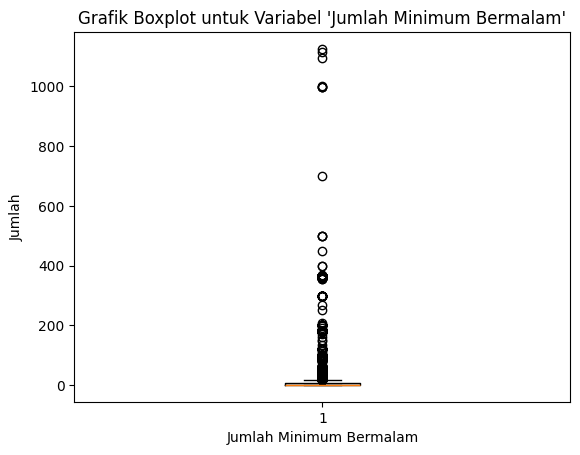

In [39]:
plt.figure(facecolor= "white")
plt.boxplot(df2['minimum_nights'])
plt.title("Grafik Boxplot untuk Variabel 'Jumlah Minimum Bermalam'")

plt.xlabel("Jumlah Minimum Bermalam")
plt.ylabel("Jumlah")

Text(0, 0.5, 'Rata-rata Review')

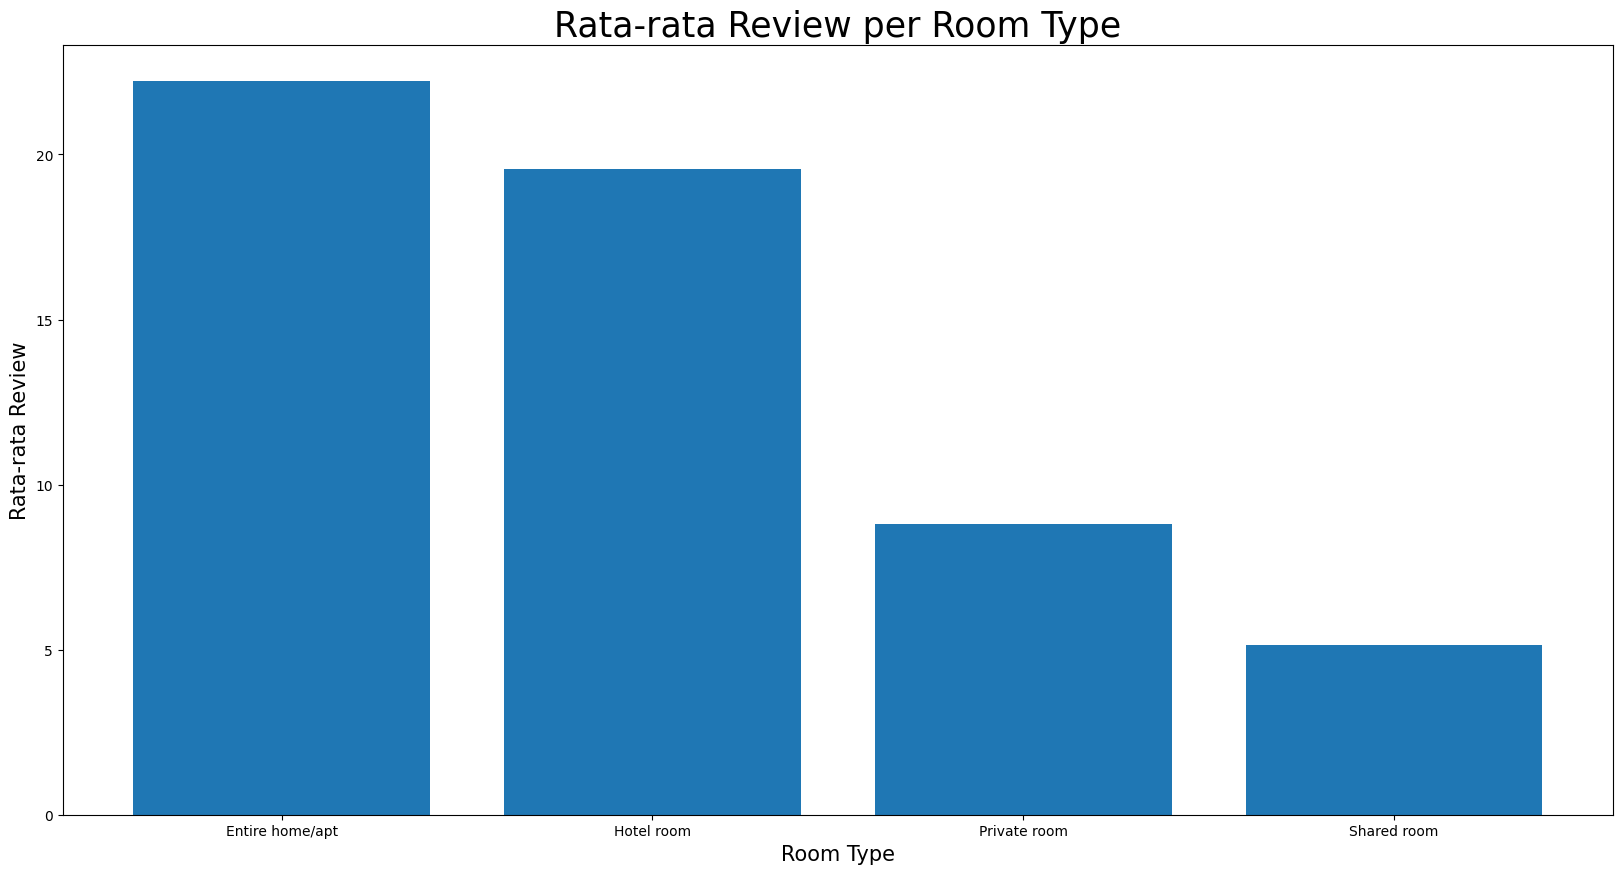

In [40]:
review_per_room_type = df2.groupby(by= "room_type")['number_of_reviews'].mean().reset_index()
review_per_room_type = review_per_room_type.sort_values("number_of_reviews", ascending= False)

plt.figure(figsize=(20, 10))
plt.bar(
    review_per_room_type.room_type, 
    review_per_room_type.number_of_reviews
)
plt.title("Rata-rata Review per Room Type", fontsize = 25)
plt.xlabel("Room Type", fontsize = 15)
plt.ylabel("Rata-rata Review", fontsize = 15)

Kesimpulan barplot di atas:
- Entire home/apt yang paling banyak mendapat review dari pelanggan
- Share room yang paling sedikit mendapat review dari pelanggan
- Private room memiliki jumlah review terbesar kedua

In [41]:
mean_review = df2.groupby('room_type')['number_of_reviews'].mean().reset_index()
mean_review

,room_type,number_of_reviews
0,Entire home/apt,22.213332
1,Hotel room,19.568567
2,Private room,8.799202
3,Shared room,5.128107


Text(0.5, 1.0, 'Perbandingan Rata-rata Jumlah Review berdasarkan Room Type')

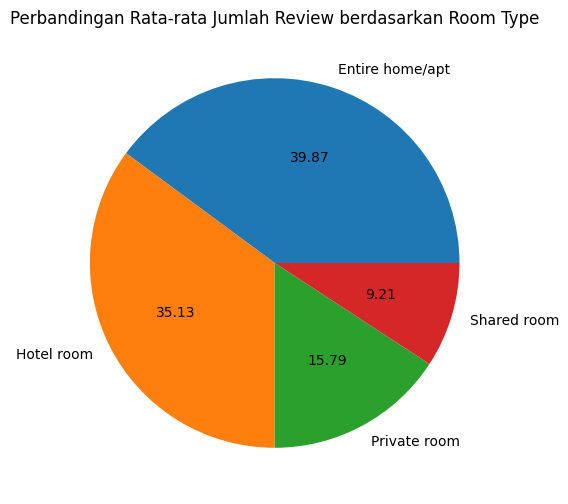

In [42]:
plt.figure(figsize= (10,6))
plt.pie(
    mean_review['number_of_reviews'], # data yg dibandingkan
    labels = mean_review['room_type'], #data yg dibandingkan
    autopct = '%.2f' #memunculkan percentage
    )
plt.title("Perbandingan Rata-rata Jumlah Review berdasarkan Room Type")

Kesimpulan pie chart di atas:
- Jumlah Review terbanyak pertama yaitu dari Entire home/apt, kedua hotel room
- Jumlah review terkecil yaitu shared room

Text(0, 0.5, 'Rata-rata Ketersediaan')

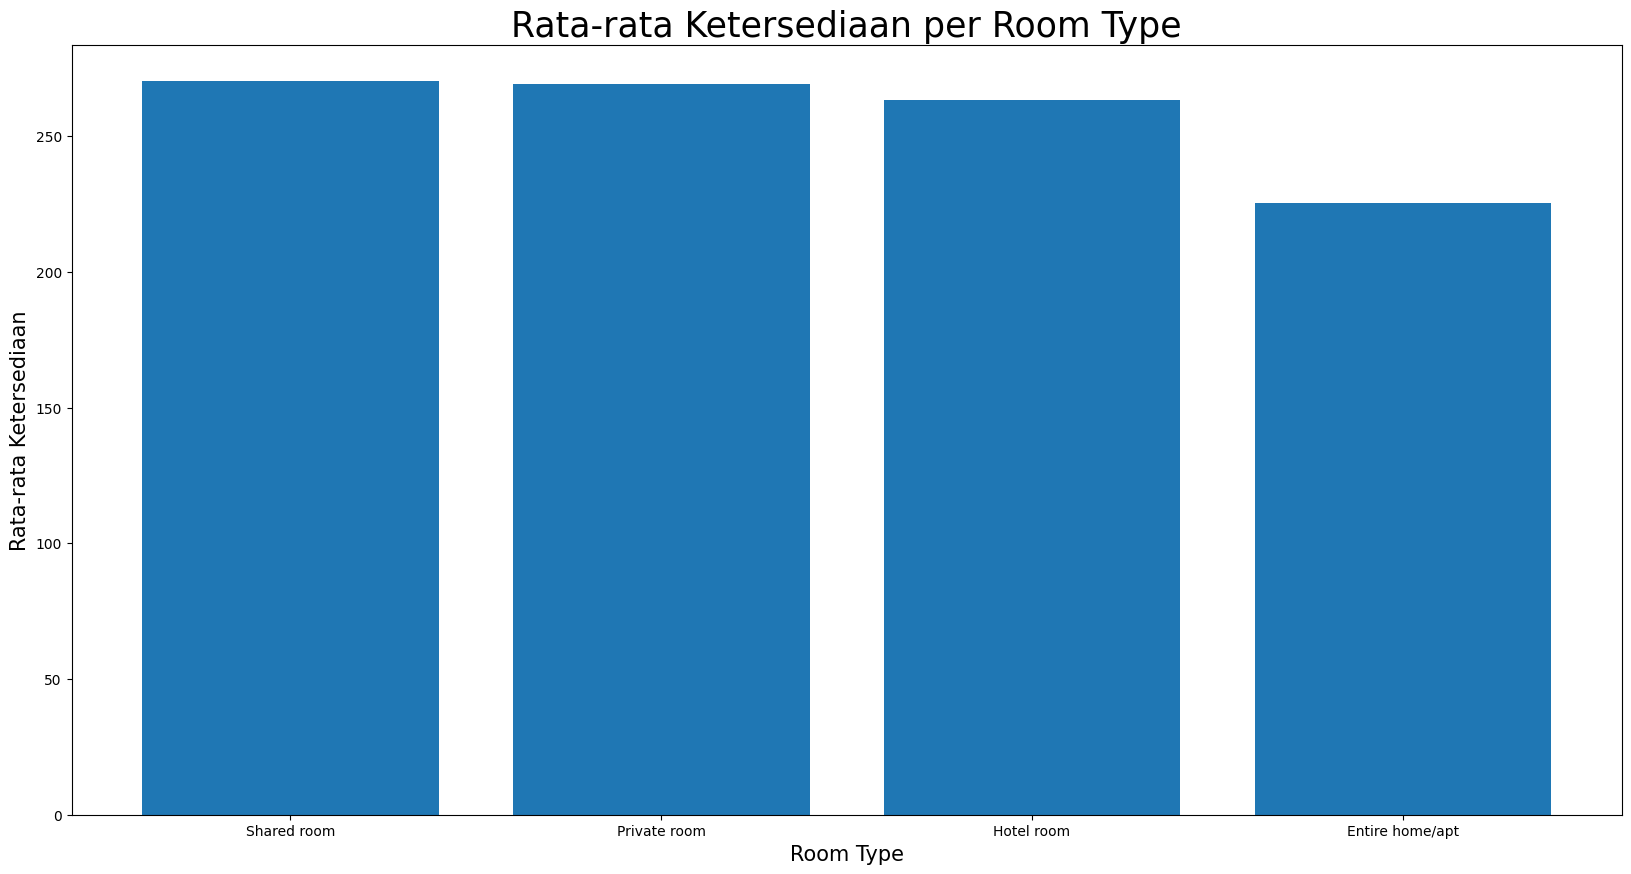

In [43]:
availability_per_room_type = df2.groupby(by= "room_type")['availability_365'].mean().reset_index()
availability_per_room_type = availability_per_room_type.sort_values("availability_365", ascending= False)

plt.figure(figsize=(20, 10))
plt.bar(
    availability_per_room_type.room_type, 
    availability_per_room_type.availability_365
)
plt.title("Rata-rata Ketersediaan per Room Type", fontsize = 25)
plt.xlabel("Room Type", fontsize = 15)
plt.ylabel("Rata-rata Ketersediaan", fontsize = 15)

Kesimpulan barplot di atas:
- Entire home/apt memiliki sedikit tingkat ketersediaan untuk disewakan
- Share room memiliki banyak tingkat ketersediaan untuk disewakan

Kalau dihubungkan dengan jumlah review yang didapat sebelumnya berarti:
- Entire home/apt yang jumlah review lebih banyak memiliki tingkat ketersediaan lebih sedikit
- Share room yang jumlah review sedikit memiliki tinggal ketersediaan lebih banyak

Text(0, 0.5, 'Rata-rata Keterisian/Occupancy')

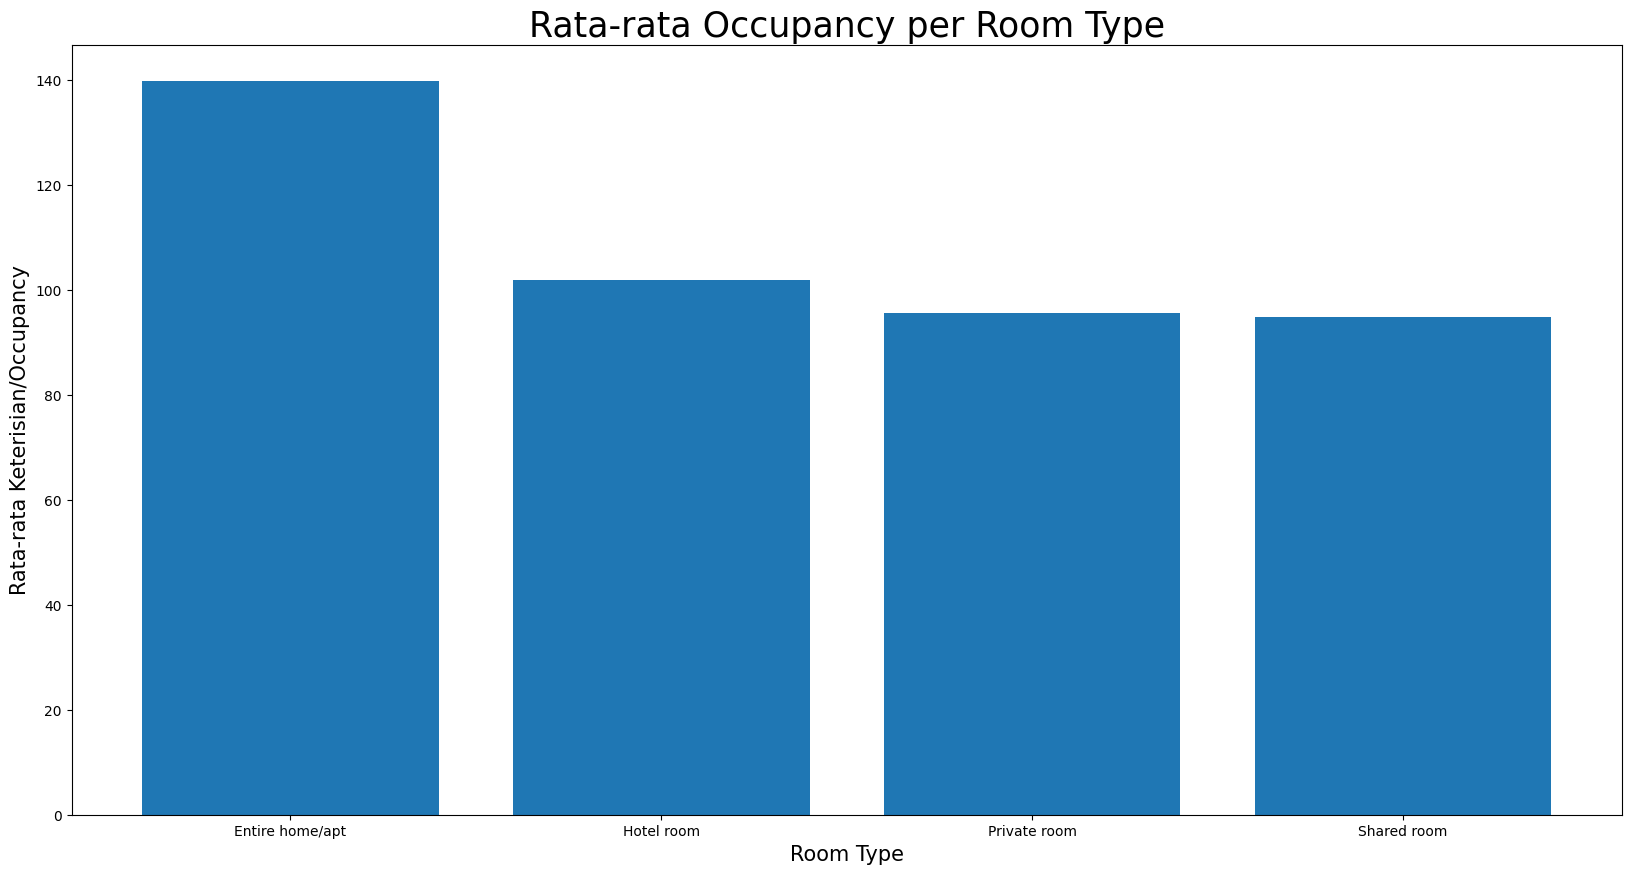

In [44]:
occupancy_per_room_type = df2.groupby(by= "room_type")['occupancy'].mean().reset_index()
occupancy_per_room_type = occupancy_per_room_type.sort_values("occupancy", ascending= False)

plt.figure(figsize=(20, 10))
plt.bar(
    occupancy_per_room_type.room_type, 
    occupancy_per_room_type.occupancy
)
plt.title("Rata-rata Occupancy per Room Type", fontsize = 25)
plt.xlabel("Room Type", fontsize = 15)
plt.ylabel("Rata-rata Keterisian/Occupancy", fontsize = 15)

Kesimpulan barplot di atas:
- Entire home/apt memiliki tingkat okupansi tertinggi (paling laku)
- Share room memiliki tingkat okupansi terendah (paling tidak laku)

Sejalan dengan kesimpulan barplot sebelumnya

In [45]:
mean_occ = df2.groupby('room_type')['occupancy'].mean().reset_index()
mean_occ

,room_type,occupancy
0,Entire home/apt,139.734149
1,Hotel room,101.853621
2,Private room,95.679278
3,Shared room,94.852772


Text(0.5, 1.0, 'Perbandingan Rata-rata Occupancy berdasarkan Room Type')

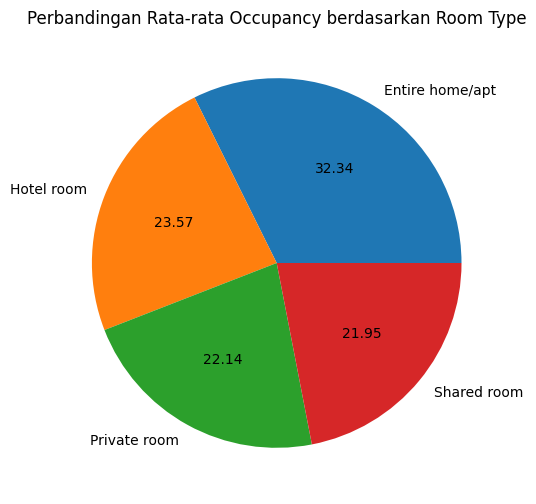

In [46]:
plt.figure(figsize= (10,6))
plt.pie(
    mean_occ['occupancy'], # data yg dibandingkan
    labels = mean_occ['room_type'], #data yg dibandingkan
    autopct = '%.2f' #memunculkan percentage
    )
plt.title("Perbandingan Rata-rata Occupancy berdasarkan Room Type")

Kesimpulan pie chart di atas:
- Porsi occupancy dari semua tipe room

Text(0, 0.5, 'Rata-rata Harga')

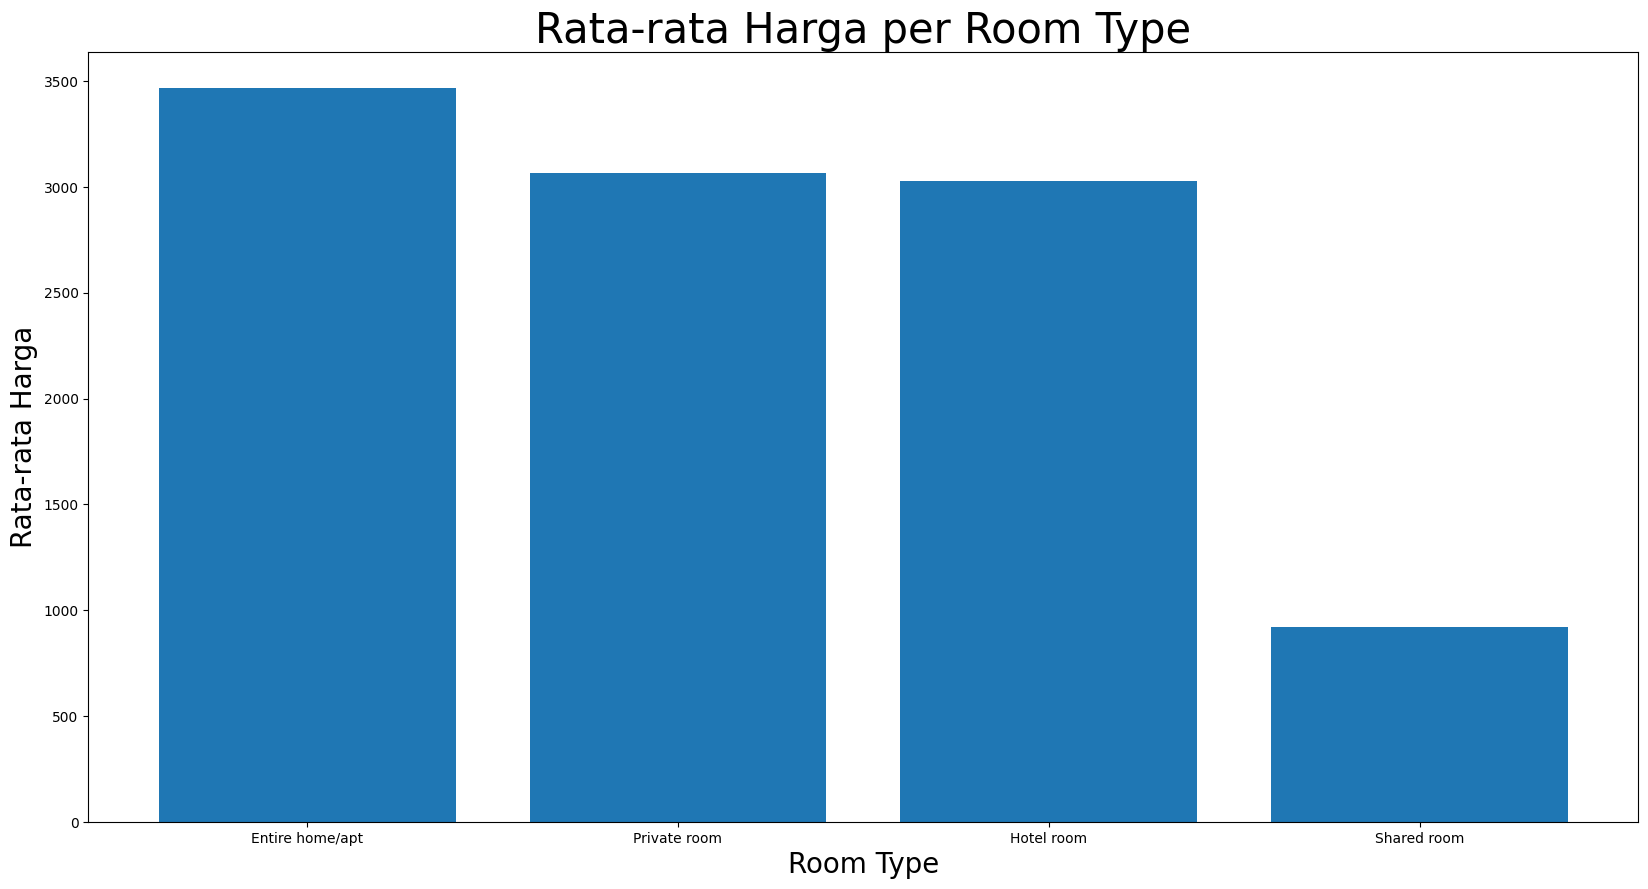

In [47]:
price_per_room_type = df2.groupby(by= "room_type")['price'].mean().reset_index()
price_per_room_type = price_per_room_type.sort_values("price", ascending= False)

plt.figure(figsize=(20, 10))
plt.bar(
    price_per_room_type.room_type, 
    price_per_room_type.price
)
plt.title("Rata-rata Harga per Room Type", fontsize = 30)
plt.xlabel("Room Type", fontsize = 20)
plt.ylabel("Rata-rata Harga", fontsize = 20)

Kesimpulan barplot di atas:
- Kalau sebelumnya kita melihat tingkat occupancy entire home/apt jauh lebih tinggi dibanding room type lainnya, menariknya disini kita melihat bahwa rata-rata harga entire home/apt tidak terlampau berbeda jauh daripada private room dan hotel room
- Shared room memiliki rata-rata harga sewa terendah
- Private room dan Hotel room memiliki rata-rata harga yang hampir mirip

Text(0, 0.5, 'Rata-rata Occupancy')

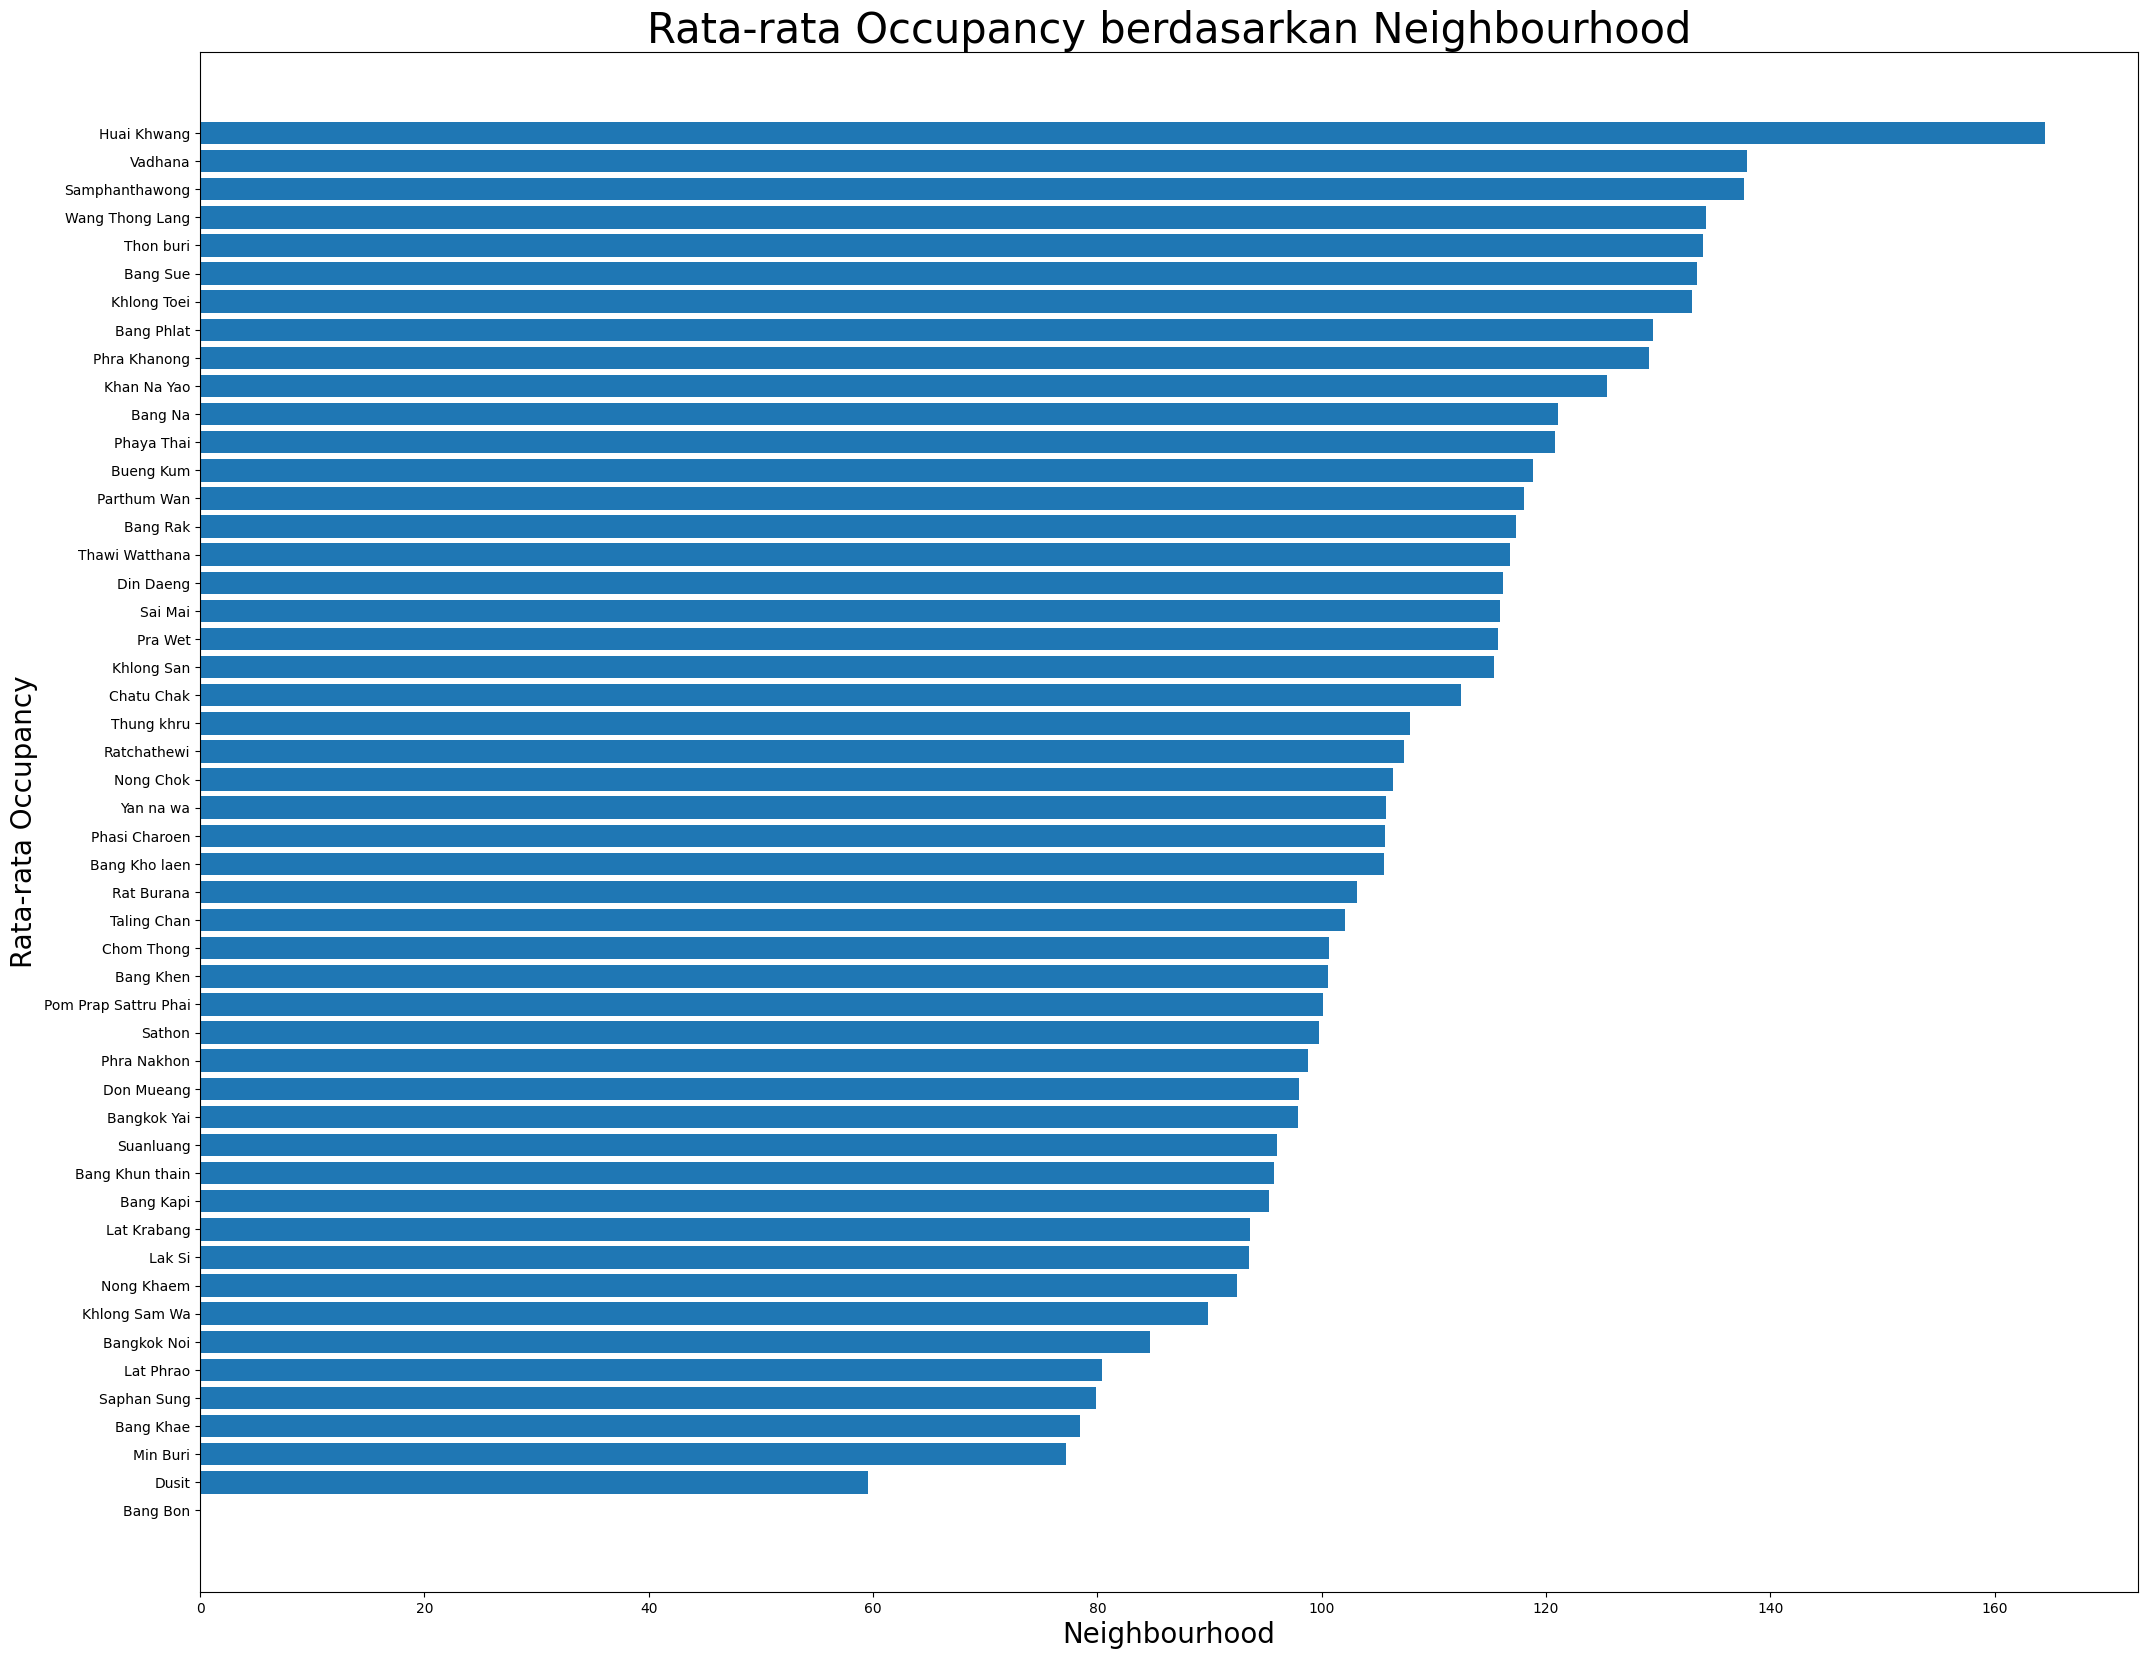

In [48]:
occupancy_per_neighbourhood = df2.groupby(by= "neighbourhood")['occupancy'].mean().reset_index()
occupancy_per_neighbourhood = occupancy_per_neighbourhood.sort_values("occupancy", ascending= True)

plt.figure(figsize=(25, 20))
plt.barh(
    occupancy_per_neighbourhood.neighbourhood, 
    occupancy_per_neighbourhood.occupancy
)
plt.title("Rata-rata Occupancy berdasarkan Neighbourhood", fontsize = 30)
plt.xlabel("Neighbourhood", fontsize = 20)
plt.ylabel("Rata-rata Occupancy", fontsize = 20)

Kesimpulan barplot di atas:
- Memunculkan lokasi-lokasi yang tingkat okupansinya tertinggi sampai ke terendah
- Lokasi yang dekat dengan 'Huai Khwang' lebih banyak dipilih oleh pelanggan
- 5 besar lokasi yang banyak dipilih oleh pelanggan adalah: 'Huai Khwang', 'Vadhana', 'Samphanthawong', 'Wang Thong Lang', 'Thon buri

In [49]:
bangkok_map = folium.Map(
    location= [13.736717, 100.523186 ], #titik kordinat latitude dan longitude lokasi
    zoom_start = 12, #seberapa jauh zoom didlm peta
    tile = 'Stamen Terrain'
)

folium.Marker(
    [13.736717, 100.523186], # koordinat lokasi yang ingin ditunjukan
    popup= "Bangkok"
).add_to(bangkok_map)


bangkok_map

In [50]:
lat_long_list= [
    [13.736717, 100.523186],
    [13.78118, 100.58349],
    [13.74293, 100.55603],
    [13.739890, 100.501790],
    [13.789380, 100.613400],
    [13.726463, 100.491293]
]

loc_name_list = [
    'Bangkok',
    'Huai Khwang',
    'Vadhana',
    'Samphanthawong',
    'Wang Thong Lang',
    'Thon buri'
]


for index, value in enumerate(lat_long_list):
    folium.Marker(
        lat_long_list[index],  #koordinat lokasi ingin ditujukan
        popup = loc_name_list[index],
        icon= folium.Icon(icon="home")
    ).add_to(bangkok_map)

bangkok_map

Map di atas menunjukan gambaran 5 lokasi strategis yang tingkat okupansinya tertinggi, yang digemari oleh para pelanggan

Text(0, 0.5, 'Harga')

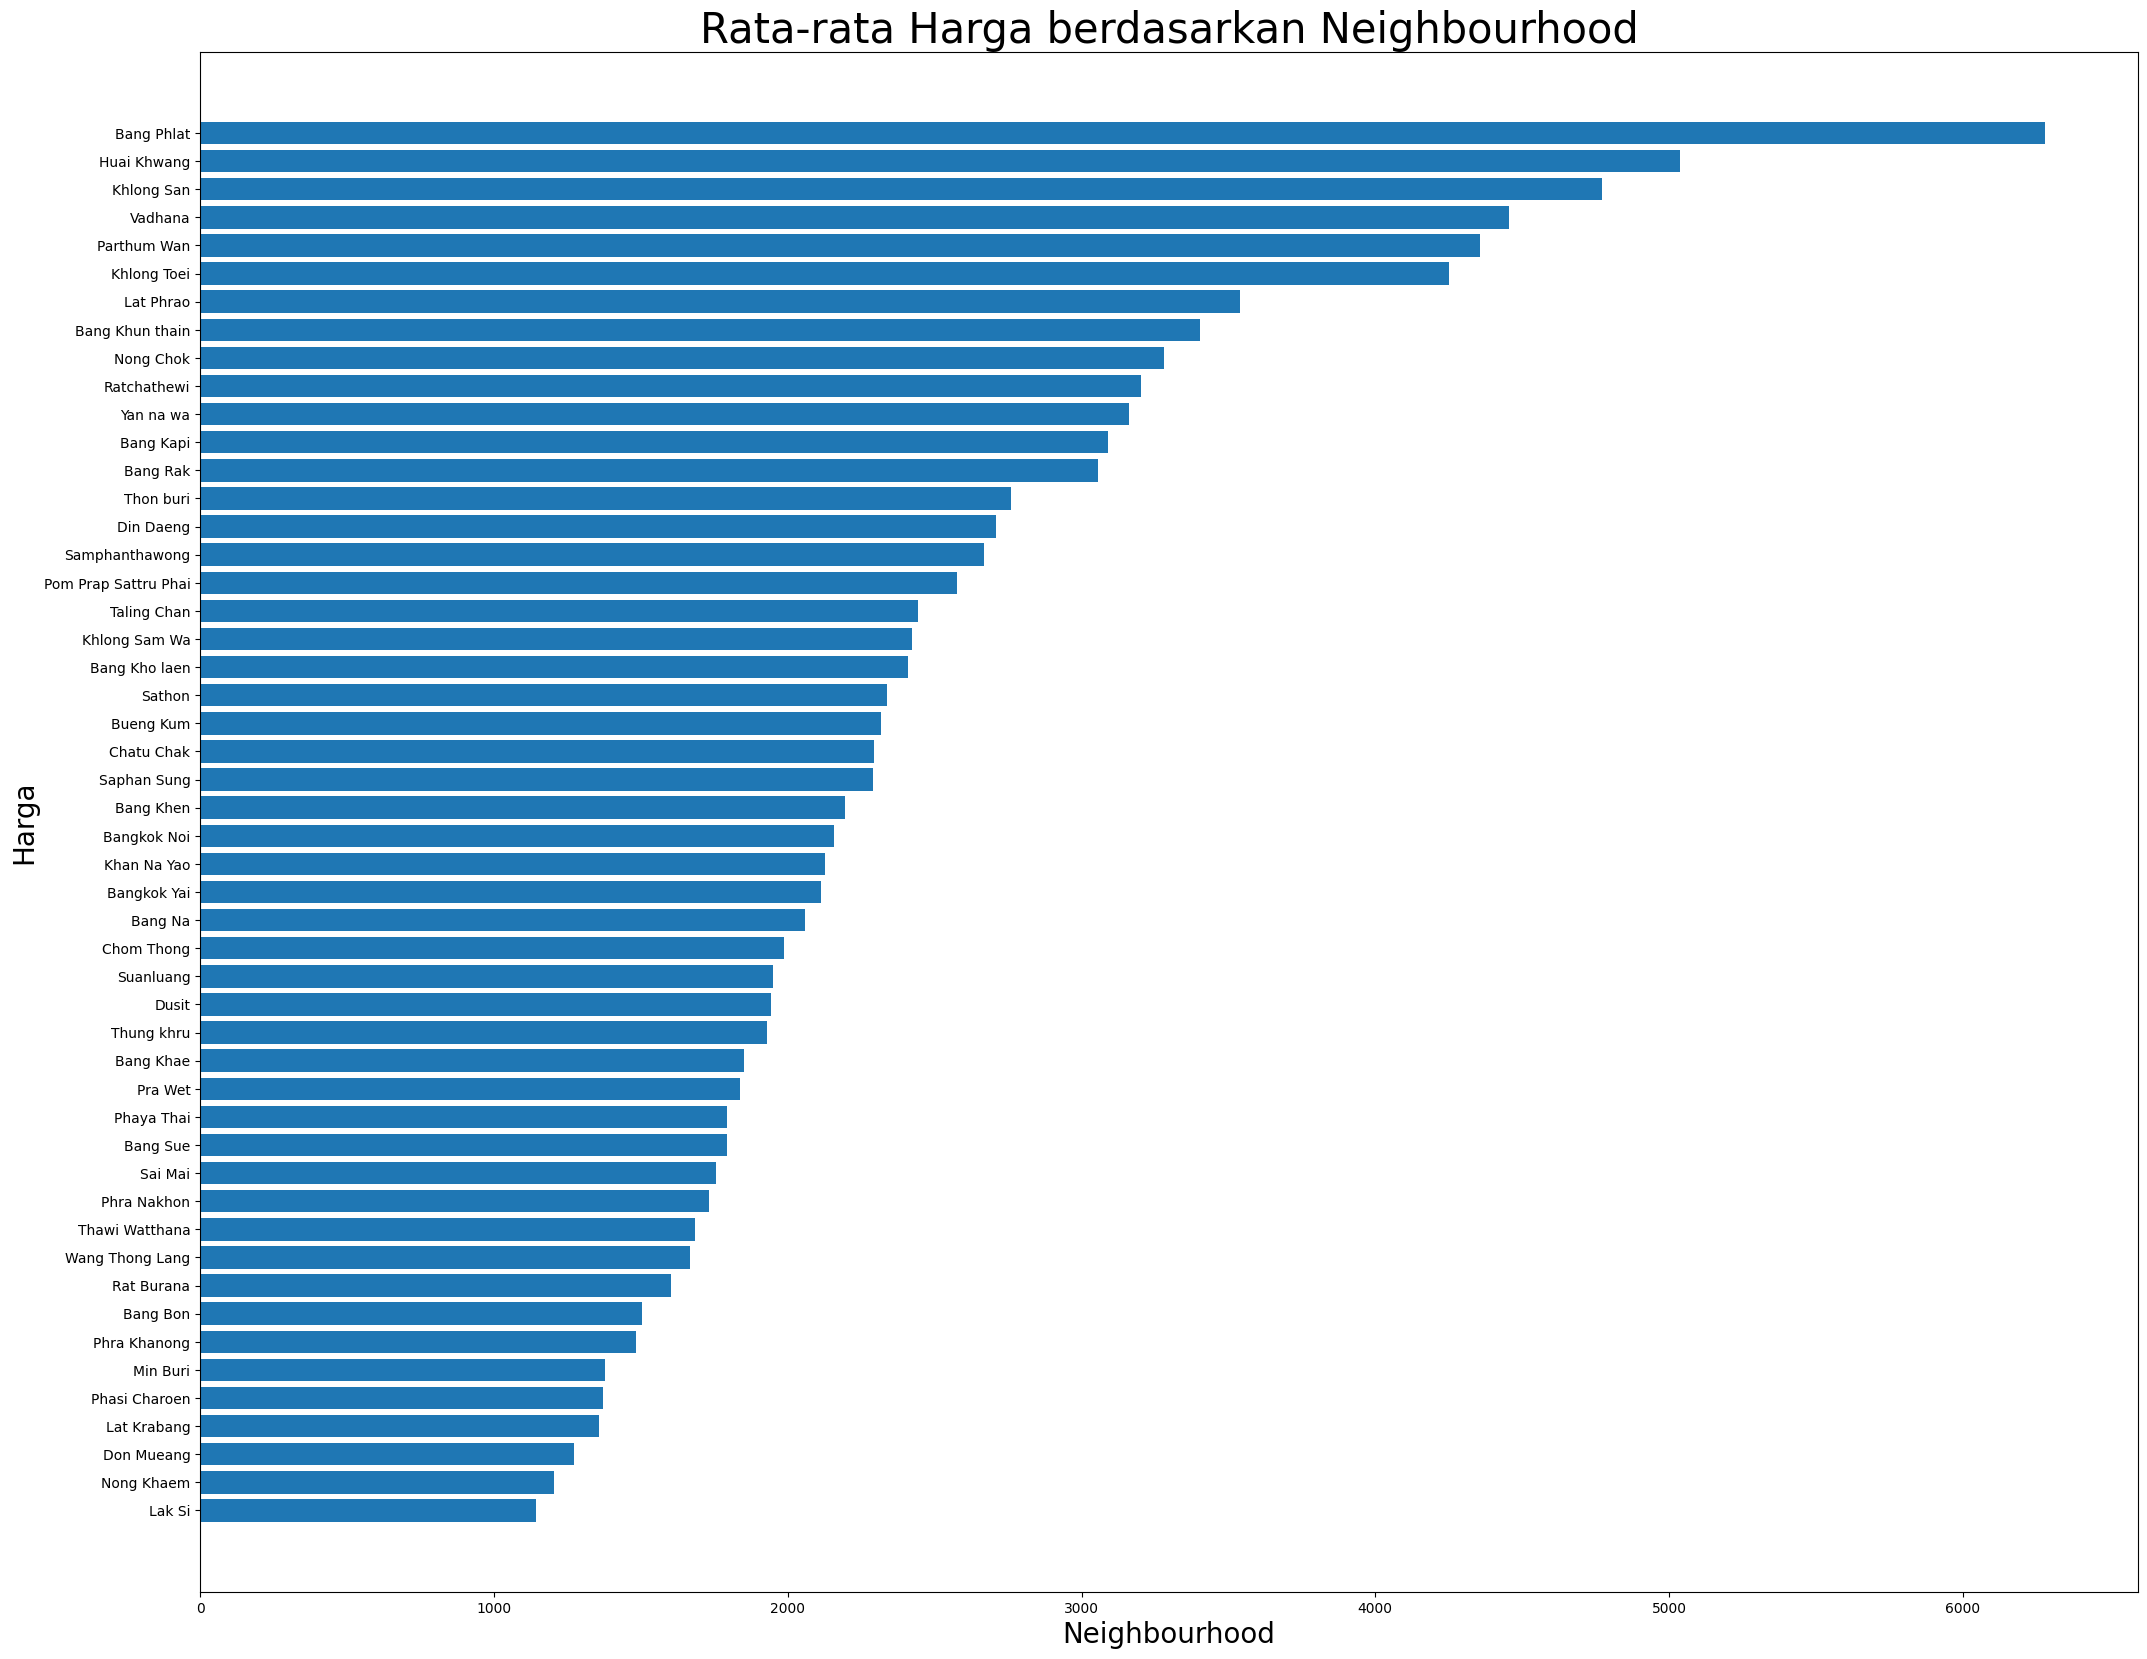

In [51]:
price_per_neighbourhood = df2.groupby(by= "neighbourhood")['price'].mean().reset_index()
price_per_neighbourhood = price_per_neighbourhood.sort_values("price", ascending= True)

plt.figure(figsize=(25, 20))
plt.barh(
    price_per_neighbourhood.neighbourhood, 
    price_per_neighbourhood.price
)
plt.title("Rata-rata Harga berdasarkan Neighbourhood", fontsize = 30)
plt.xlabel("Neighbourhood", fontsize = 20)
plt.ylabel("Harga", fontsize = 20)

Kesimpulan pada barplot di atas:
- Memunculkan lokasi-lokasi yang harga sewanya tertinggi sampai ke yang terendah harganya
- Huai Khwang dan Vadhana yang termasuk 5 besar lokasi yang paling tinggi occupancy-nya ternyata masuk ke 5 besar harga sewa tertinggi
- Harga paling tinggi itu adalah pada lokasi sekitar 'Bang Phlat'
- 5 besar harga tertinggi berdasarkan lokasi neighbourhood-nya adalah: 'bang phlat', 'huai khwang', 'khlong san', 'Vadhana', 'Parthum Wan'

Text(0, 0.5, 'Harga')

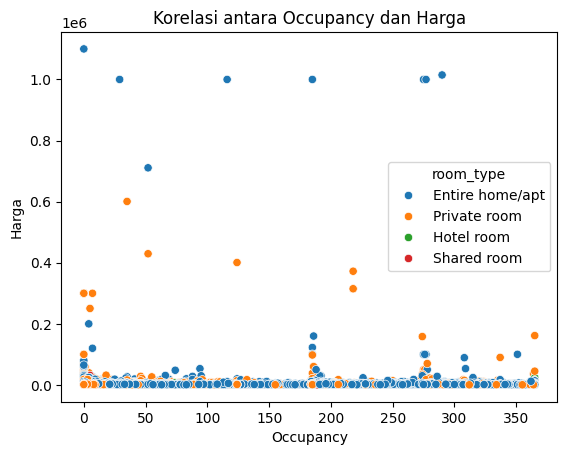

In [52]:

sns.scatterplot(x= df2.occupancy, y= df2.price, hue= df2.room_type)
plt.title("Korelasi antara Occupancy dan Harga")
plt.xlabel("Occupancy")
plt.ylabel("Harga")



Scatterplot di atas menggambarkan hubungan antara tingkat occupancy dengan harga berdasarkan tipe-tipe room
- Semua tipe room yang harganya rendah yang terisi

Text(0, 0.5, 'Jumlah Review')

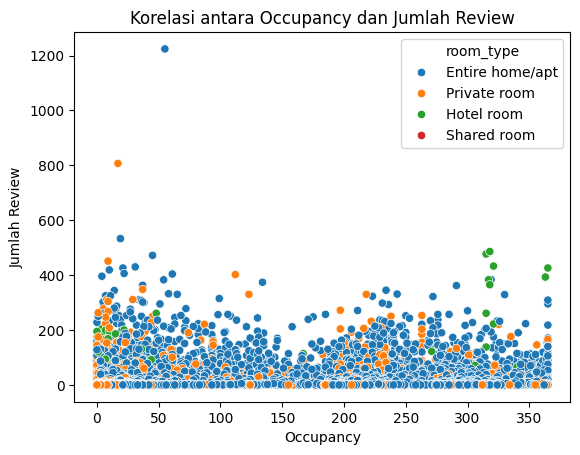

In [53]:
sns.scatterplot(x= df2.occupancy, y = df2.number_of_reviews, hue = df2.room_type)
plt.title("Korelasi antara Occupancy dan Jumlah Review")
plt.xlabel("Occupancy")
plt.ylabel("Jumlah Review")

Scatterplot di atas menggambarkan hubungan tingkat occupancy dengan jumlah review pelanggan
- Dari semua tipe room dan tingkat occupancy, yang memberikan review sedikit, rata-rata < 200 jumlah review
- Pada hotel room yang tingkat occupancynya tinggi mendapat lebih banyak jumlah review (terlihat dari jumlah titik hijau di kanan lebih dominan, walaupun tidak terlalu banyak juga)

Text(0, 0.5, 'Minimum Nights')

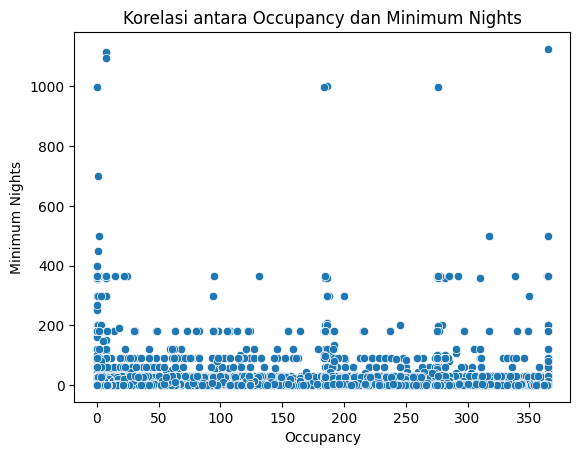

In [54]:
sns.scatterplot(x= df2.occupancy, y = df2.minimum_nights)
plt.title("Korelasi antara Occupancy dan Minimum Nights")
plt.xlabel("Occupancy")
plt.ylabel("Minimum Nights")

Scatterplot di atas menggambarkan hubungan occupancy dan minimum bermalam:
- Mayoritas penyewa lebih banyak memilih yang minimum nightsnya lebih pendek < 30 hari


Text(0, 0.5, 'Review per Month')

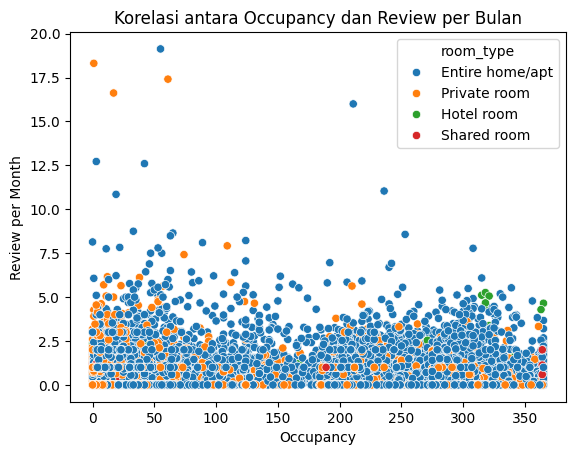

In [55]:
sns.scatterplot(x= df2.occupancy, y = df2.reviews_per_month, hue = df2.room_type)
plt.title("Korelasi antara Occupancy dan Review per Bulan")
plt.xlabel("Occupancy")
plt.ylabel("Review per Month")

Scatterplot di atas menggambarkan tingkat occupancy dengan rata-rata review per bulan:
- Pada semua tingkat occupancy, rata-rata review per bulannya < 2,5 kali

In [56]:
df2_corr = df2[['occupancy', 'price', 'number_of_reviews']].corr()
df2_corr

,occupancy,price,number_of_reviews
occupancy,1.000000,-0.000816,0.077066
price,-0.000816,1.000000,-0.004381
number_of_reviews,0.077066,-0.004381,1.000000


Text(0.5, 1.0, 'Korelasi antara Occupancy, Harga dan Jumlah Review')

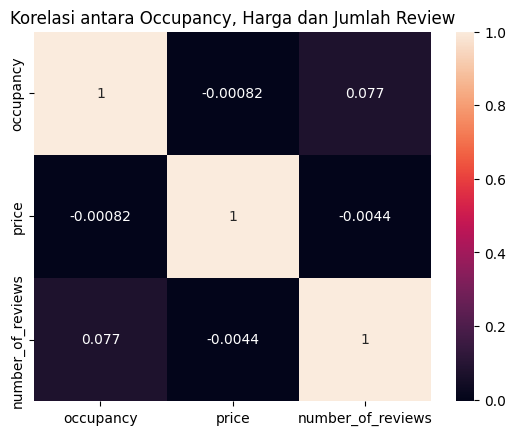

In [57]:
sns.heatmap(
    df2_corr,
    annot = True
)
plt.title("Korelasi antara Occupancy, Harga dan Jumlah Review")

Heatmap di atas memberikan gambaran highlight korelasi antara occupancy, harga dan jumlah review
- nilai korelasinya mendekati 0 semua artinya nilai korelasinya lemah semua
- pada heatmap yang warnanya gelap artinya lemah korelasinya
- jadi antara occupancy dengan harga, occupancy dengan jumlah review, dan sebaliknya, korelasinya lemah

## KESIMPULAN DAN REKOMENDASI

KESIMPULAN
1. Preferensi penyewa terhadap tipe room
    - Dari 4 Tipe Room yang ditawarkan, preferensi tertinggi penyewa pada tipe room: 'Entire Home/Apt' merupakan sebuah kelebihan Airbnb dibanding aplikasi OTA (online travel agent) lainnya karena segment pasarnya berbeda, differensiasi produk. Pada barplot rata-rata harga per room type kalau dilihat perbedaan harga antara entire home dengan hotel dan private room hanya beda sedikit, tidak jauh lebih mahal, mungkin ini juga menjadi salah satu penyebab entire home/apt lebih dipilih karena kapasitas menampung orangnya pun lebih banyak
    - Tipe room yang paling kurang peminat adalah: 'Shared Room' walaupun rata-rata harganya lebih rendah dibanding tipe lainnya
    - Tipe hotel room dan private room memiliki rata-rata harga yang mirip, tetapi tingkat occupancy hotel lebih tinggi sedikit daripada private room

2. Tingkat Occupancy tidak ada kaitannya dengan harga dan juga tidak ada kaitannya dengan jumlah review
    - Harga sewa yang rendah tidak menjamin penyewa lebih banyak dan harga sewa yang tinggi tidak menjamin penyewa menjadi lebih sedikit
    - Jumlah review tidak menjamin penyewa lebih banyak dan jumlah review sedikit tidak menjamin penyewa menjadi lebih sedikit
    - Tingkat occupancy lebih kepada preferensi penyewa terhadap kebutuhannya, budgetnya dan kenyamanannya, perlu untuk menggali pada data customer untuk mencari informasi pilihan pelanggan

3. Jumlah review
    - Rata-rata review terbanyak dari entire place karena occupancynya tertinggi
    - Porsi jumlah review pada hotel jauh lebih banyak daripada private room, padahal tingkat occupancynya hanya melebihi sedikit, jadi penyewa lebih tertarik mereview entire home/apt dan hotel room ketimbang private room dan shared room, bisa disimpulkan bahwa penyewa yang memilih entire home/apt dan hotel room lebih aware terhadap experience saat menginap, ketimbang penyewa yang memilih private room dan shared room yang hanya stay dengan budget friendly

4. Neighbourhood 
    - Property yang lebih diminati adalah yang sekitar pusat kota Bangkok

REKOMENDASI
1. Pada data host_id dan host_name ditemui ada 1 host_name yang sama tetapi mendaftar host_id berbeda, perlu evaluasi lebih lanjut untuk mengatasi hal ini, agar host_id unique hanya merecord 1 host_name saja, jika maksud host_name mendaftar lebih dari 1 host_id untuk mendaftarkan property yang lain, perlu perbaikan untuk memfasilitasi hal ini
2. Fitur SEO bagi host_name untuk mengiklankan property agar lebih menguntungkan bagi host_name untuk mengatasi 1 properti didaftarkan dengan beberapa id
3. Peningkatan jumlah review penyewa property agar dapat menjadi acuan penyewa sebagai bahan pertimbangan dalam memilih property yang disewakan, bisa dilakukan program pemberian reward apabila penyewa memberikan review di aplikasi
4. Menjaga fasilitas dan kenyamanan pada entire home/apt dan hotel room, karena orang yang menyewa kedua jenis room ini lebih aware terhadap experience saat menginap, supaya tidak mendapat review jelek dan menurunkan tingkat occupancy roomnya
5. Memaksimalkan private room dari sisi harga, sisi kemudahan dan kenyamanan penyewa agar dapat meningkatkan tingkat occupancynya
6. Menambahkan nilai lebih pada shared room, dari sisi privacy, servie dan fasilitas penunjang sosialnya sehingga, penyewa lebih tertarik untuk memilih jenis room ini